In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df = sns.load_dataset('titanic')

In [2]:
print(df['sex'].value_counts())

sex
male      577
female    314
Name: count, dtype: int64


In [3]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


__Absolute frequency__

In [5]:
a=df['class'].value_counts()
print(a)

class
Third     491
First     216
Second    184
Name: count, dtype: int64


__Relative frequency__

In [7]:
b=df['class'].value_counts(normalize=True)
print(b)

class
Third     0.551066
First     0.242424
Second    0.206510
Name: proportion, dtype: float64


In [8]:
print(df['class'].describe())

count       891
unique        3
top       Third
freq        491
Name: class, dtype: object


__Cumulative frequency__

In [10]:
c=df['class'].value_counts().cumsum()
print(c)

class
Third     491
First     707
Second    891
Name: count, dtype: int64


__Seems like,population based on classes are, Third class passengers (55.1%) ,first(24.24%) and second class(20.65%)__

In [12]:
print(pd.DataFrame({
    'abs':a,
    'rel':b,
    'cum':c
})
)

        abs       rel  cum
class                     
Third   491  0.551066  491
First   216  0.242424  707
Second  184  0.206510  891


In [13]:
table=pd.crosstab(df['sex'],df['survived'])
print(table)

survived    0    1
sex               
female     81  233
male      468  109


In [14]:
table=pd.crosstab(df['sex'],df['survived'],margins=True)
print(table)

survived    0    1  All
sex                    
female     81  233  314
male      468  109  577
All       549  342  891


In [15]:
#joint probability
table=pd.crosstab(df['sex'],df['survived'],normalize=True)
print(table)

survived         0         1
sex                         
female    0.090909  0.261504
male      0.525253  0.122334


__We can see that, probability of beaing a female AND being a survivour is 26.15%__

In [17]:
#marginal probability
print(df['sex'].value_counts(normalize=True)['female'])
print(df['survived'].value_counts(normalize=True)[1])

0.35241301907968575
0.3838383838383838


__It is observed that 35.24% of the passenger population is female.
And Only 38.38% of the population survived in the disaster__

In [19]:
#conditional probability
print(pd.crosstab(df['sex'],df['survived'],normalize='index'))
print('------------------------------------------------------------------------')
print(pd.crosstab(df['survived'],df['sex'],normalize='index'))

survived         0         1
sex                         
female    0.257962  0.742038
male      0.811092  0.188908
------------------------------------------------------------------------
sex         female      male
survived                    
0         0.147541  0.852459
1         0.681287  0.318713


__As we can see that, probability of getting survived given being a female is 74.20%
And probability of being female considering a person's already survived is 68.12%__

In [21]:
#correlation
cor=df['age'].corr(df['fare'])
print(cor)
df_new=df.dropna()
cor=df_new['age'].corr(df_new['fare'])
print(cor)

0.09606669176903894
-0.0907303639409494


__As we can see that, after removing null values, correlation changed drastically. Now actually with age and fare there's negative correlation i.e; if one entity increases other value tends to decreases and the strength of correlation is WEAK.__

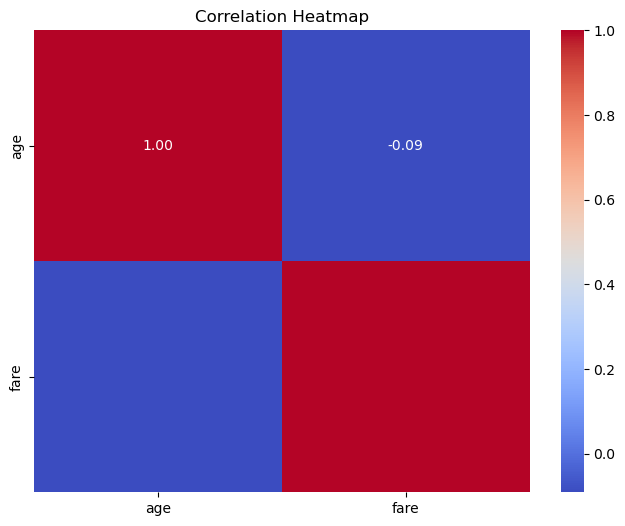

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_new[['age','fare']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

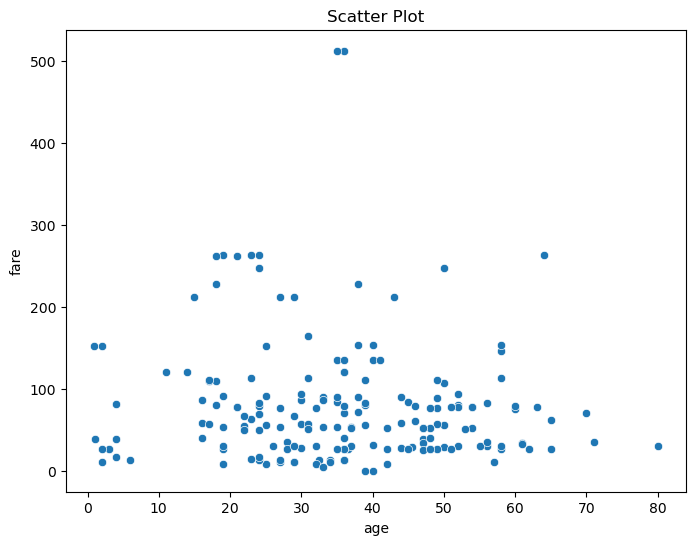

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_new, x='age', y='fare')
plt.title("Scatter Plot")
plt.show()

__In scatter plot, we can see that there are some outliers present not following general trend and there are clusters present at the region fare=100.__

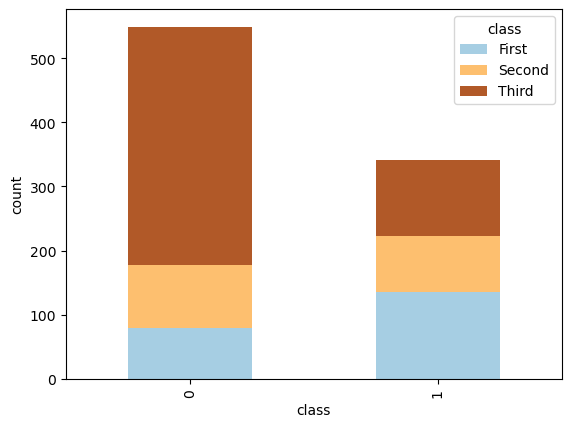

In [26]:
table = pd.crosstab(df['survived'], df['class'])
table.plot(kind='bar', stacked=True, colormap='Paired')
plt.xlabel('class')
plt.ylabel('count')
plt.show()

__clearly, First class passengers are having higher survival rate than remaining other classes. This may be due to prizes offered for saving their lives.__